## Problem Statement

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from warnings import filterwarnings
filterwarnings('ignore')

## Importing Dataset

In [99]:
Orig_df = pd.read_csv('train.csv')
AV_test_df = pd.read_csv('test.csv')

## Data Analysis

In [3]:
Orig_df.shape

(88858, 10)

In [4]:
Orig_df.shape

(88858, 10)

### Data Check

In [5]:
Orig_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [6]:
Orig_df.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


In [7]:
Orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
ID                         88858 non-null object
Estimated_Insects_Count    88858 non-null int64
Crop_Type                  88858 non-null int64
Soil_Type                  88858 non-null int64
Pesticide_Use_Category     88858 non-null int64
Number_Doses_Week          88858 non-null int64
Number_Weeks_Used          79858 non-null float64
Number_Weeks_Quit          88858 non-null int64
Season                     88858 non-null int64
Crop_Damage                88858 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


> - All columns except for Number_Weeks_Used seems to have Null values and is Float type

### Descriptive Statistics

In [8]:
Orig_df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


### Duplicate check

In [9]:
Orig_df.duplicated().any()

False

No Duplicate data in the training set

### Missing Value Check

In [10]:
Orig_df.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

There are 9000 values missing for Number_Weeks_Used

## Univariate Analysis

In [11]:
Orig_df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [12]:
Orig_df['ID'].nunique() 

88858

The ID column is unique for all rows so we wont be using this ,adding this to Drop list

In [13]:
to_drop = []
to_drop.append('ID')

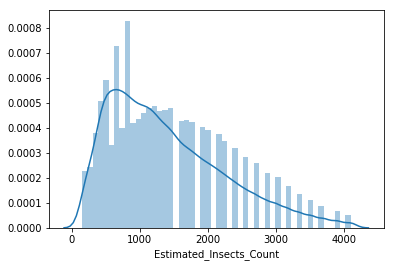

In [14]:
sns.distplot(Orig_df['Estimated_Insects_Count']) # its for Estimated insects count per square meter

The Estimated_Insects_Count is conitnous but its right skewed and hence ovio the mean > median

In [15]:
Orig_df['Crop_Type'].value_counts()

0    63589
1    25269
Name: Crop_Type, dtype: int64

Only two types of the Crop exists 0,1

In [16]:
Orig_df['Soil_Type'].value_counts()

0    48124
1    40734
Name: Soil_Type, dtype: int64

In [17]:
Orig_df['Pesticide_Use_Category'].value_counts()

2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64

In [18]:
Orig_df['Number_Doses_Week'].value_counts()

20    22589
40    12298
10    12111
30    10438
15     8178
5      5520
25     4890
60     4367
50     3361
35     1832
45      936
0       837
80      672
70      303
55      277
90       83
65       64
75       61
95       30
85       11
Name: Number_Doses_Week, dtype: int64

Number of doses per week is mostly 20 weeks or followed by 40 weeks

In [19]:
Orig_df['Number_Weeks_Used'].value_counts()

20.0    3878
30.0    3765
25.0    3120
40.0    2707
15.0    2486
        ... 
63.0      50
64.0      44
65.0      31
66.0      17
67.0       8
Name: Number_Weeks_Used, Length: 64, dtype: int64

In [20]:
# plt.bar(Orig_df['Number_Weeks_Used'],Orig_df['Number_Weeks_Used'].count())

(array([37743., 12024., 12779., 10665.,  7279.,  4350.,  2501.,  1041.,
          383.,    93.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

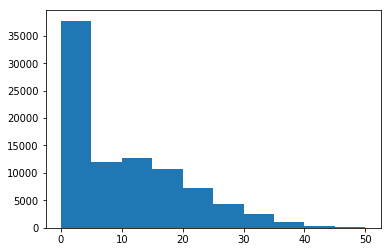

In [21]:
plt.hist(Orig_df['Number_Weeks_Quit'])

In [22]:
Orig_df['Season'].value_counts()

2    44210
1    26902
3    17746
Name: Season, dtype: int64

In [23]:
Orig_df['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

## Imputing the Missing Values

In [24]:
Orig_df['Number_Weeks_Used'] = Orig_df['Number_Weeks_Used'].fillna(Orig_df['Number_Doses_Week']) #imputed with the values of number of doses

In [25]:
AV_test_df.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [100]:
AV_test_df['Number_Weeks_Used'] = AV_test_df['Number_Weeks_Used'].fillna(AV_test_df['Number_Doses_Week']) #imputed with the values of number of doses

In [27]:
Orig_df.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [28]:
AV_test_df.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

## Dropping columns

In [29]:
Orig_df.drop(columns=['ID'],inplace=True)

In [114]:
AV_test_df.drop(columns=['ID'],inplace=True)

## Creating X,y

In [31]:
X = Orig_df[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season']]
y = Orig_df['Crop_Damage']

## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

## Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
std_scaler = StandardScaler()
X_train_scale = std_scaler.fit_transform(X_train)
X_test_scale = std_scaler.fit_transform(X_test)

## Applying models

In [36]:
print(X_train.shape,X_test.shape)

(71086, 8) (17772, 8)


In [37]:
print(y_train.shape,y_test.shape)

(71086,) (17772,)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [39]:
classifiers = {
    "LogisiticRegression": LogisticRegression(random_state=0),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=0),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "Naive Bayes": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=0),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=0),
    "XGBClassifier":XGBClassifier(random_state=0)
    }

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [41]:
my_metrics = pd.DataFrame()
for key, classifier in classifiers.items():
    classifier.fit(X_train_scale,y_train)
    y_pred = classifier.predict(X_test_scale)
    testing_score = round(accuracy_score(y_test,y_pred),3)
    training_score = round(np.mean((cross_val_score(classifier, X_train_scale, y_train, cv=5))),3)
    print("Training Score for {model} is {train_score}".format(model=key,train_score=training_score))
    print("Testing Score for {model} is {test_score}".format(model=key,test_score=testing_score))
    fit = ""
    if training_score > testing_score:
        fit="Good Fit"
    else:
        fit="Overfit"
    metrics_dict = {}
    metrics_dict = {'Classifier':key,'Test Accuracy':testing_score,'Train Accuracy':training_score,'fit': fit}
    my_metrics = my_metrics.append(metrics_dict,ignore_index=True)

    

Training Score for LogisiticRegression is 0.834
Testing Score for LogisiticRegression is 0.832
Training Score for KNearest is 0.829
Testing Score for KNearest is 0.827
Training Score for Support Vector Classifier is 0.841
Testing Score for Support Vector Classifier is 0.84
Training Score for DecisionTreeClassifier is 0.749
Testing Score for DecisionTreeClassifier is 0.747
Training Score for Naive Bayes is 0.822
Testing Score for Naive Bayes is 0.823
Training Score for Random Forest Classifier is 0.824
Testing Score for Random Forest Classifier is 0.823
Training Score for GradientBoostingClassifier is 0.844
Testing Score for GradientBoostingClassifier is 0.844
Training Score for AdaBoostClassifier is 0.84
Testing Score for AdaBoostClassifier is 0.837
Training Score for XGBClassifier is 0.843
Testing Score for XGBClassifier is 0.844


In [44]:
my_metrics

,Classifier,Test Accuracy,Train Accuracy,fit
0,LogisiticRegression,0.832,0.834,Good Fit
1,KNearest,0.827,0.829,Good Fit
2,Support Vector Classifier,0.840,0.841,Good Fit
3,DecisionTreeClassifier,0.747,0.749,Good Fit
4,Naive Bayes,0.823,0.822,Overfit
5,Random Forest Classifier,0.823,0.824,Good Fit
6,GradientBoostingClassifier,0.844,0.844,Overfit
7,AdaBoostClassifier,0.837,0.840,Good Fit
8,XGBClassifier,0.844,0.843,Overfit


In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
params = {'max_depth':[3,4,5,6], 'learning_rate':np.arange(0.0,1.0,0.02), 'n_estimators':[100,200,300,400]}




In [73]:
xgb = XGBClassifier()
rscv = RandomizedSearchCV(xgb,param_distributions=params,scoring='accuracy',cv=5)

In [74]:
rscv.fit(X_train_scale,y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'learning_rate': array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98]),
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='accuracy')

In [77]:
rscv.best_estimator_

XGBClassifier(learning_rate=0.7000000000000001, objective='multi:softprob')

In [79]:
xgb_model = XGBClassifier(learning_rate=0.7,n_estimators=100,max_depth=3,random_state=0)

In [80]:
xgb_model.fit(X_train_scale,y_train)

XGBClassifier(learning_rate=0.7, objective='multi:softprob')

In [82]:
y_pred_xgb = xgb_model.predict(X_test_scale)

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
testing_score = round(accuracy_score(y_test,y_pred_xgb),3)
training_score = round(np.mean((cross_val_score(xgb_model, X_train_scale, y_train, cv=5))),3)


Training Score for XGBClassifier is 0.846
Testing Score for XGBClassifier is 0.847


In [84]:
print(training_score,testing_score)

0.846 0.847


## Removing 2 columns based on feature importance

In [89]:
X_train_imp = X_train.drop(columns=['Soil_Type','Season'])
X_test_imp = X_test.drop(columns=['Soil_Type','Season'])

In [90]:
X_train_imp_scale = std_scaler.fit_transform(X_train_imp)
X_test_imp_scale = std_scaler.fit_transform(X_test_imp)

In [91]:
xgb_model.fit(X_train_imp_scale,y_train)

XGBClassifier(learning_rate=0.7, objective='multi:softprob')

In [92]:
y_pred_xgb1 = xgb_model.predict(X_test_imp_scale)

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
testing_score = round(accuracy_score(y_test,y_pred_xgb1),3)
training_score = round(np.mean((cross_val_score(xgb_model, X_train_imp_scale, y_train, cv=5))),3)

In [94]:
print(testing_score,training_score)

0.847 0.846


In [102]:
AV_test_imp = AV_test_df.drop(columns=['Soil_Type','Season'])

In [105]:
AV_scale = std_scaler.fit_transform(AV_test_imp)

In [106]:
y_pred_res = xgb_model.predict(AV_scale)

In [107]:
AV_test_df = pd.read_csv('test.csv')
AV_test_df.shape

(59310, 9)

In [108]:
result_out = AV_test_df[['ID']]
result_out['Crop_Damage'] = y_pred_res
result_out = result_out[['ID','Crop_Damage']]

In [109]:
result_out.to_csv('AV_Agri_XGB.csv',index=False)

## Removing 3 column based on RandomForest Feature Importance

In [115]:
X_train_imp2 = X_train.drop(columns=['Soil_Type','Season','Crop_Type'])
X_test_imp2 = X_test.drop(columns=['Soil_Type','Season','Crop_Type'])
AV_test_imp2 = AV_test_df.drop(columns=['Soil_Type','Season','Crop_Type'])

In [116]:
X_train_imp_scale2 = std_scaler.fit_transform(X_train_imp2)
X_test_imp_scale2 = std_scaler.fit_transform(X_test_imp2)
AV_scale2 = std_scaler.fit_transform(AV_test_imp2)

In [117]:
params = {'max_depth':[3,4,5,6], 'learning_rate':np.arange(0.0,1.0,0.02), 'n_estimators':[100,200,300,400]}

In [118]:
rscv.fit(X_train_imp_scale2,y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'learning_rate': array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98]),
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='accuracy')

In [119]:
rscv.best_params_

{'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.16}

In [120]:
xgb_model3 = XGBClassifier(learning_rate=0.16,n_estimators=300,max_depth=4,random_state=0)

In [121]:
xgb_model3.fit(X_train_imp_scale2,y_train)

y_pred_xgb3 = xgb_model3.predict(X_test_imp_scale2)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
testing_score = round(accuracy_score(y_test,y_pred_xgb3),3)
training_score = round(np.mean((cross_val_score(xgb_model3, X_train_imp_scale2, y_train, cv=5))),3)


In [122]:
print(testing_score,training_score)

0.846 0.844


In [128]:
y_pred_xgb3_AV = xgb_model3.predict(AV_scale2)

In [130]:
AV_test_df = pd.read_csv('test.csv')
result_out = AV_test_df[['ID']]
result_out['Crop_Damage'] = y_pred_xgb3_AV
result_out = result_out[['ID','Crop_Damage']]

In [131]:
result_out.to_csv('AV_Agri_XGB3.csv',index=False)